In [1]:
# Análisis exploratorio del dataset de películas (TMDB)
Este cuaderno analiza un dataset consolidado de alrededor 1000 películas extraídas de la API de TMDB para los años 1950, 1960, 1970, 1975, 1982, 1990, 1994, 1999, 2001, 2005, 2007, 2012, 2019, 2022 y 2024. El objetivo es explorar sus características

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carga del dataset
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,567609,Noche de bodas,Ready or Not,['United States of America'],"Durante la noche de su boda, una mujer recibe ...",Comienza el juego.,2019-08-21,en,"Terror, Comedia",95,6000000,57600000,"['Samara Weaving', 'Adam Brody', ""Mark O'Brien""]",7.0,Tyler Gillett,"['escape', 'ritual', 'marriage', 'satanism', '..."
1,299534,Vengadores: Endgame,Avengers: Endgame,['United States of America'],Después de los eventos devastadores de 'Vengad...,Nada puede prepararte para el final.,2019-04-24,en,"Aventura, Ciencia ficción, Acción",181,356000000,2799439100,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",8.2,Anthony Russo,"['superhero', 'time travel', 'space travel', '..."
2,299537,Capitana Marvel,Captain Marvel,['United States of America'],La historia sigue a Carol Danvers mientras se ...,Más alto. Más lejos. Más rápido.,2019-03-06,en,"Acción, Aventura, Ciencia ficción",125,152000000,1131416446,"['Brie Larson', 'Samuel L. Jackson', 'Ben Mend...",6.8,Ryan Fleck,"['superhero', 'based on comic', 'alien invasio..."
3,320288,X-Men: Fénix oscura,Dark Phoenix,['United States of America'],Los X-Men se enfrentan a su enemigo más podero...,Ella resurgirá.,2019-06-05,en,"Ciencia ficción, Acción, Aventura",116,200000000,252442974,"['Sophie Turner', 'James McAvoy', 'Nicholas Ho...",6.0,Simon Kinberg,"['superhero', 'mutant', 'telekinesis', 'based ..."
4,515001,Jojo Rabbit,Jojo Rabbit,"['New Zealand', 'United States of America']",Jojo Rabbit es un niño viviendo en plena 2ª Gu...,Una sátira contra el odio.,2019-10-18,en,"Comedia, Bélica, Drama",108,14000000,82468705,"['Roman Griffin Davis', 'Thomasin McKenzie', '...",8.0,Taika Waititi,"['based on novel or book', 'world war ii', 'je..."


In [3]:
print("Películas cargadas: ", len(df))
print("\nColumnas disponibles: ", df.columns.tolist(),"\n")
df.info()

Películas cargadas:  4500

Columnas disponibles:  ['id', 'title', 'original_title', 'production_countries', 'overview', 'tagline', 'release_date', 'original_language', 'genres', 'runtime', 'budget', 'revenue', 'cast', 'vote_average', 'director', 'keywords'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4500 non-null   int64  
 1   title                 4500 non-null   object 
 2   original_title        4500 non-null   object 
 3   production_countries  4500 non-null   object 
 4   overview              3544 non-null   object 
 5   tagline               1549 non-null   object 
 6   release_date          4500 non-null   object 
 7   original_language     4500 non-null   object 
 8   genres                4474 non-null   object 
 9   runtime               4500 non-null   int64  
 10  budget          

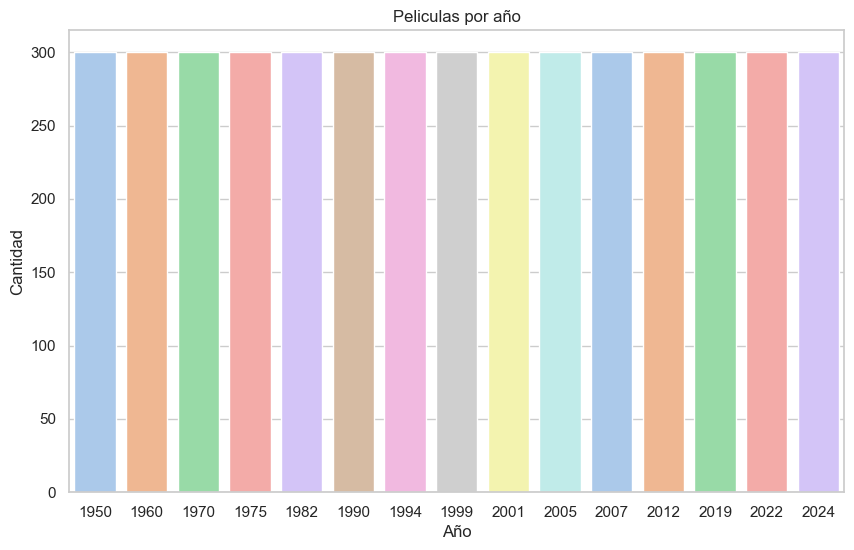

In [5]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

sns.countplot(data=df, x="release_year", hue="release_year", palette="pastel", legend= False)
plt.title("Peliculas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

In [7]:
# Valores faltantes por columna

df.isnull().mean().sort_values(ascending=False)

tagline                 0.655778
overview                0.212444
genres                  0.005778
director                0.003333
budget                  0.000000
keywords                0.000000
vote_average            0.000000
cast                    0.000000
revenue                 0.000000
id                      0.000000
runtime                 0.000000
title                   0.000000
original_language       0.000000
release_date            0.000000
production_countries    0.000000
original_title          0.000000
release_year            0.000000
dtype: float64

In [9]:
# Porcentaje de valores nulos por columna
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline     65.58
overview    21.24
genres       0.58
director     0.33
dtype: float64

In [18]:
**Nota**: Hay valores ausentes en tagline, overview, genres y director. Evaluaremos más adelante si rellenarlos, eliminarlos o ignorarlos en el entrenamiento.

SyntaxError: invalid syntax (3373989955.py, line 1)

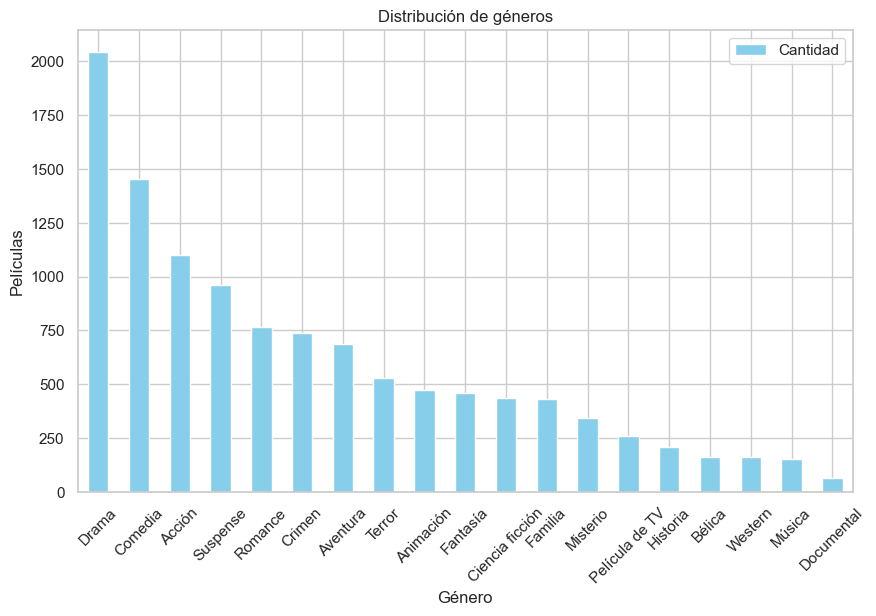

In [11]:
# Distribución de géneros

from collections import Counter
import ast

all_genres = []
for entry in df["genres"].dropna():
    genres = [g.strip() for g in entry.split(",")]
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
pd.DataFrame(genre_counts.most_common(), columns=["Género", "Cantidad"]).set_index("Género").plot(kind="bar", color="skyblue")
plt.title("Distribución de géneros")
plt.ylabel("Películas")
plt.xticks(rotation=45)
plt.show()

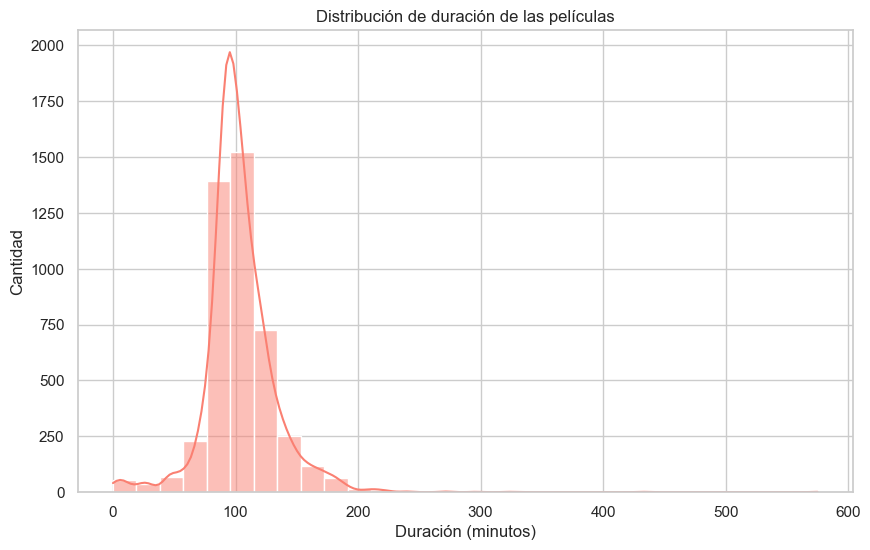

In [13]:
# Duración de las películas

sns.histplot(df["runtime"].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribución de duración de las películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad")
plt.show()

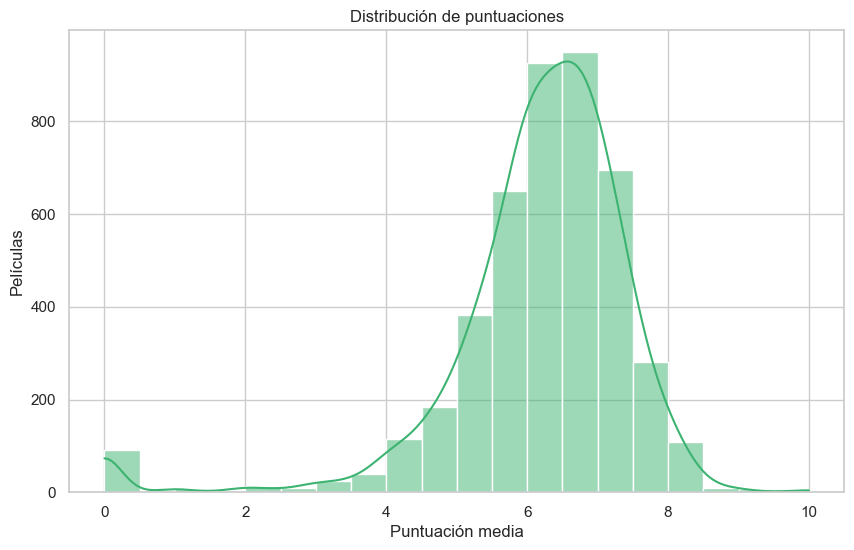

In [15]:
# Puntuaciones

sns.histplot(df["vote_average"], bins=20, kde= True, color="mediumseagreen")
plt.title("Distribución de puntuaciones")
plt.xlabel("Puntuación media")
plt.ylabel("Películas")
plt.show()

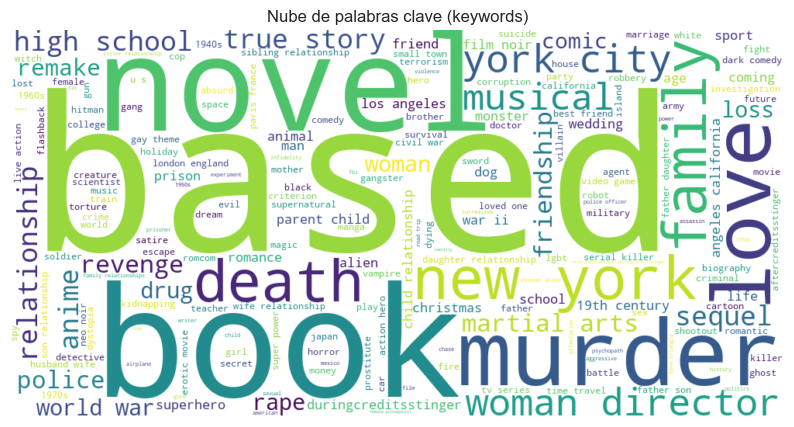

In [17]:
# Exploración de palabras clave

from wordcloud import WordCloud

keywords = []
for entry in df["keywords"].dropna():
    try:
        kws = ast.literal_eval(entry)
        keywords.extend(kws)
    except:
        continue

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras clave (keywords)")
plt.show()

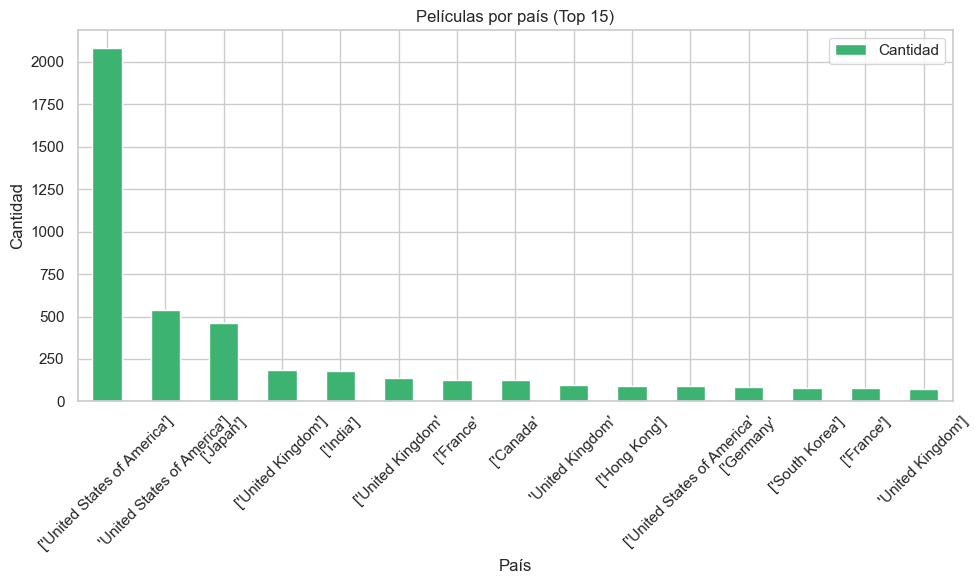

In [19]:
# Conteo por países

all_countries = []
for entry in df["production_countries"].dropna():
    countries = [c.strip() for c in entry.split(",")]
    all_countries.extend(countries)

country_counts = Counter(all_countries)

top_countries = country_counts.most_common(15)

# Graficar
pd.DataFrame(top_countries, columns=["País", "Cantidad"]).set_index("País").plot(
    kind="bar", color="mediumseagreen"
)

plt.title("Películas por país (Top 15)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Algeria']", "'Australia'", "'Australia']", "'Austria'", "'Austria']", "'Barbados']", "'Belgium'", "'Brazil'", "'Bulgaria'", "'Bulgaria']", "'Canada'", "'Canada']", "'Chile']", "'China'", "'China']", "'Colombia'", "'Cyprus']", "'Czech Republic'", "'Czech Republic']", "'Czechoslovakia'", "'Denmark'", "'Ecuador'", "'Estonia'", "'Finland'", "'Finland']", "'France'", "'France']", "'Germany'", "'Germany']", "'Greece'", "'Greece']", "'Guadaloupe'", "'Hong Kong'", "'Hong Kong']", "'Hungary'", "'Hungary']", "'Iceland'", "'India'", "'India']", "'Iraq']", "'Ireland'", "'Ireland']", "'Israel'", "'Israel']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Kazakhstan'", "'Liechtenstein'", "'Luxembourg'", "'Luxembourg']", "'Malta'", "'Mexico'", "'Mexico']", "'Morocco'", "'Netherlands'", "'Netherlands']", "'New Zealand'", "'Norway'", "'Peru'", "'Peru']", "'Poland'", "'Poland']", "'Portugal'", "'Portugal']", "'Puerto Rico']", "'Romania'", "'Romania']", "'Russia'", "'Russia']", "'Serbia'", "'Serbia']

In [ ]:
**Nota**: Los países están mal formateados, y eso provoca repeticiones. 

In [23]:
# Nombres de director

directores = df['director'].value_counts(dropna=False)
print(directores)

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
NaN                15
Tim Burton         13
Sidney Lumet       11
Woody Allen        10
Chang Cheh          9
                   ..
Jeffrey W. Byrd     1
Boyapati Srinu      1
Peter Gilstrap      1
David Kendall       1
Peter Cattaneo      1
Name: count, Length: 3017, dtype: int64
['Aamir Khan', 'Aaron Huggett', 'Aaron Lipstadt', 'Aaron Mirtes', 'Aaron Nee', 'Aaron Norris', 'Aashiq Abu', 'Abbas Alibhai Burmawalla', 'Abbas Kiarostami', 'Abel Ferrara', 'Abel Gance', 'Abhishek Pathak', 'Abhishek Varman', 'Abraham Polonsky', 'Adam B. Stein', 'Adam Elliot', 'Adam Randall', 'Adam Rehmeier', 'Adam Resnick', 'Adam Rifkin', 'Adam Robitel', 'Adam Shankman', 'Adam Simon', 'Adam Stern', 'Adam Wingard', 'Adil El Arbi', 'Aditya Dhar', 'Adolfo Martínez Solares', 'Adrian Grünberg', 'Adrian Lyne', 'Agathiyan', 'Agnes Ng', 'Agnieszka Holland', 'Agragami', 'Aishwarya Rajinikanth', 'Akihiko Shiota', 'Akinori Nagaoka', 'Akio Jissoji', 'Akira Kato', 'Akira Kurosawa', 'Akiva Schaffer', 'Al Adamson',

In [ ]:
**Nota**: Algunos nombres, muy pocos, están repetidos o mal escritos.  

In [36]:
# Conclusiones finales del análisis

- El dataset contiene **4500 películas** con metadatos relevantes como géneros, reparto, país, duración, ingresos y keywords.
- Hay una buena representación de varias décadas.
- Existen algunas columnas con valores nulos.
- Los países están mal formateados.    
- Los géneros más comunes son Drama, Comedia, Acción, Suspense y Crimen.
- Las notas media se concrentran entre 4 y 8.
- La duración de las películas varía ampliamente, destacando los 90 minutos.
- Es necesario algún ajuste en los nombres de los directores    
- Tras el análisis de palabras clave podemos determinar que destacan las palículas basadas en libros.    

Con esto podremos diseñar un modelo de recomendación personalizado.    

SyntaxError: invalid syntax (3516245329.py, line 3)